In [2]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

import sklearn
print(sklearn.__version__)

1.4.2


In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
housing.data.shape

(20640, 8)

In [5]:
housing.target.shape

(20640,)

In [6]:
y = housing.target

y.mean()

2.068558169089147

In [7]:
y.min(), y.max()

(0.14999, 5.00001)

In [8]:
y.std(ddof=1)

1.1539561587441387

In [9]:
import pandas as pd

df_y = pd.Series(y)

df_y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
dtype: float64

<Axes: ylabel='Frequency'>

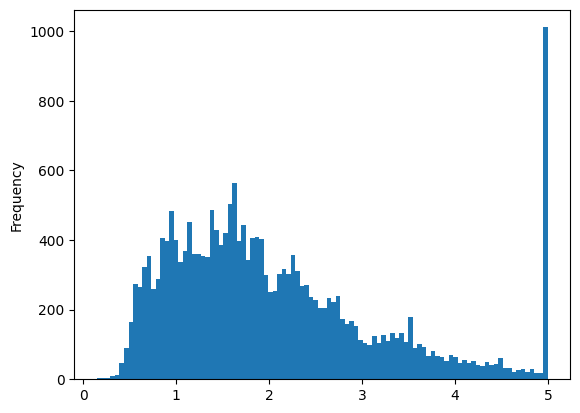

In [10]:
df_y.plot.hist(bins=100)

In [11]:
df_y.value_counts()

5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: count, Length: 3842, dtype: int64

In [12]:
model = tf.keras.models.Sequential()

In [13]:
model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(8,)))

c:\Users\Fral0\Desktop\Workbench\progetto-piccialli\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.add(tf.keras.layers.Dense(50, activation='relu'))

In [15]:
model.add(tf.keras.layers.Dense(1))

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,001 (23.44 KB)

 Trainable params: 6,001 (23.44 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
loss = tf.keras.losses.MeanSquaredError()

In [18]:
optimizer = tf.keras.optimizers.Adam()

In [19]:
model.compile(loss=loss, optimizer=optimizer, metrics=['mae', 'mse'])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42, test_size=0.2)

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [23]:
pd.DataFrame(housing.data).describe()

,0,1,2,3,4,5,6,7
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [24]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [25]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7
count,1.238400e+04,1.238400e+04,1.238400e+04,1.238400e+04,1.238400e+04,1.238400e+04,1.238400e+04,1.238400e+04
mean,-6.836908e-15,1.486035e-16,5.754799e-16,-2.065388e-15,5.163828e-17,-8.950635e-16,5.395397e-14,-3.119514e-13
std,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00
min,-1.784906e+00,-2.188039e+00,-2.177216e+00,-1.982651e+00,-1.248356e+00,-3.309182e-01,-1.446345e+00,-2.379141e+00
25%,-6.925202e-01,-8.396418e-01,-4.662898e-01,-2.385058e-01,-5.585691e-01,-8.564809e-02,-8.034211e-01,-1.107318e+00
50%,-1.684124e-01,3.285040e-02,-9.084174e-02,-1.186914e-01,-2.255082e-01,-3.068207e-02,-6.485563e-01,5.385703e-01
75%,4.609300e-01,6.673902e-01,3.052935e-01,2.193180e-02,2.618124e-01,3.488142e-02,9.751779e-01,7.829598e-01
max,5.894629e+00,1.857152e+00,2.714964e+01,2.850842e+01,3.002343e+01,8.434698e+01,2.960263e+00,2.628350e+00


In [26]:
output_scaler = StandardScaler()

output_scaler.fit(y_train.reshape(-1, 1))

y_train_scaled = output_scaler.transform(y_train.reshape(-1, 1)).ravel()
y_valid_scaled = output_scaler.transform(y_valid.reshape(-1, 1)).ravel()
y_test_scaled = output_scaler.transform(y_test.reshape(-1, 1)).ravel()

In [27]:
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_data=(X_valid_scaled, y_valid_scaled), verbose=1)

Epoch 1/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5220 - mae: 0.4976 - mse: 0.5220 - val_loss: 0.3890 - val_mae: 0.3986 - val_mse: 0.3890
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3181 - mae: 0.3939 - mse: 0.3181 - val_loss: 0.6550 - val_mae: 0.3840 - val_mse: 0.6550
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3039 - mae: 0.3732 - mse: 0.3039 - val_loss: 1.3614 - val_mae: 0.3882 - val_mse: 1.3614
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3174 - mae: 0.3640 - mse: 0.3174 - val_loss: 0.2903 - val_mae: 0.3571 - val_mse: 0.2903
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2607 - mae: 0.3561 - mse: 0.2607 - val_loss: 0.2511 - val_mae: 0.3489 - val_mse: 0.2511
Epoch 6/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2517 - mae: 0.3521 - mse: 0.2517 - val_loss: 0.2509 - val_mae: 0.3437 - val_mse: 0.2509
Epoch 7/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2330 - mae: 0.3369 - mse: 0.233

In [30]:
history

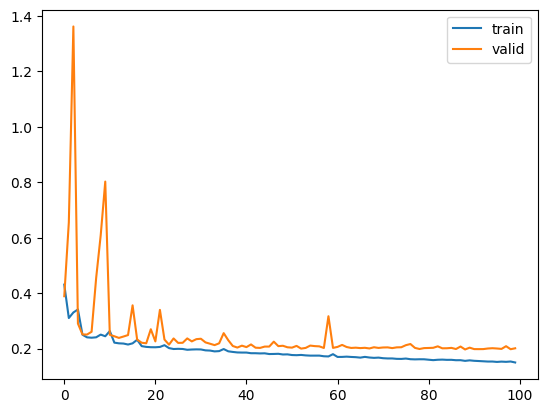

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

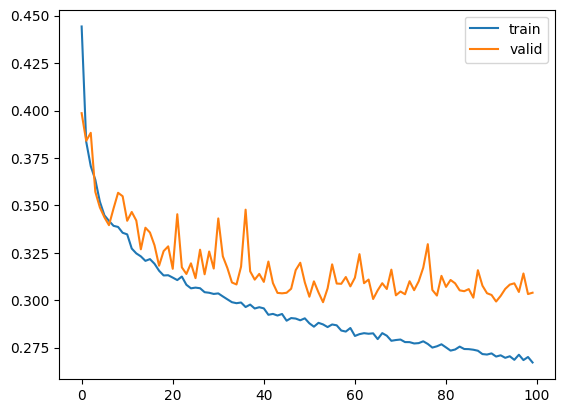

In [30]:
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='valid')
plt.legend()
plt.show()

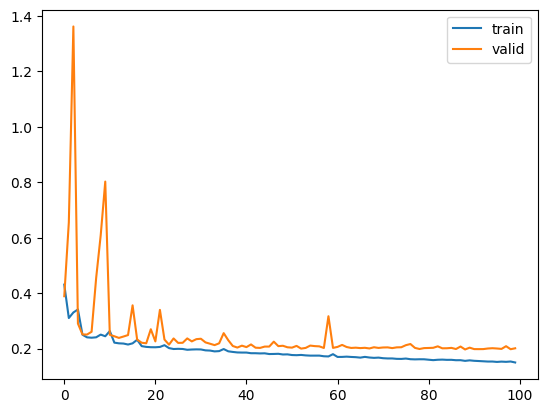

In [31]:
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='valid')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    silhouette_score,
    classification_report,
    mean_absolute_error,
    mean_squared_error,
)
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def plot_confusion_matrix(y_true, y_pred):
    # Create the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt="d")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Confusion Matrix")
    plt.show()


def print_full_classification_report(y_true, y_pred, target_names=None):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy}")

    print("Confusion matrix:")
    plot_confusion_matrix(y_true, y_pred)

    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=target_names))

    # print("Silhouette Score:", silhouette_score(y_true, y_pred))


def print_full_regression_report(y_true, y_pred):
    # Calculate the mean absolute error
    mae = mean_absolute_error(y_true, y_pred)
    print(f"Mean absolute error: {mae}")

    # Calculate the mean squared error
    mse = mean_squared_error(y_true, y_pred)
    print(f"Mean squared error: {mse}")

    # Calculate the relative error
    relative_errors = np.abs((y_true - y_pred) / y_true)
    mean_relative_error = np.mean(relative_errors)
    print(f"Mean relative error: {mean_relative_error}")


def create_training_history_plot(history):
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="valid")
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()

    plt.plot(history.history["mae"], label="train")
    plt.plot(history.history["val_mae"], label="valid")
    plt.title("Model MAE")
    plt.ylabel("MAE")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()

    plt.plot(history.history["mse"], label="train")
    plt.plot(history.history["val_mse"], label="valid")
    plt.title("Model MSE")
    plt.ylabel("MSE")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()


In [39]:
# Evaluate the model
loss, mae, mse = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# Predict the test data
y_pred = model.predict(X_test)

# Print full regression report
print_full_regression_report(y_test, y_pred)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14157.5264 - mae: 114.2680 - mse: 14157.5264
Loss: 14246.46875
Mean Absolute Error: 114.39441680908203
Mean Squared Error: 14246.46875
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step
Mean absolute error: 114.39443655627612
Mean squared error: 14246.468557748398
Mean relative error: 77.16265635355558


In [38]:
loss, mae, mse = model.evaluate(X_test_scaled, y_test_scaled)
print(f"Loss: {loss}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

y_pred_scaled = model.predict(X_test_scaled)

# Print full regression report
print_full_regression_report(y_test_scaled, y_pred_scaled)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 0.1994 - mae: 0.3021 - mse: 0.1994
Loss: 0.20119279623031616
Mean Absolute Error: 0.29997119307518005
Mean Squared Error: 0.20119279623031616
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step
Mean absolute error: 0.29997113975964274
Mean squared error: 0.2011927697674142
Mean relative error: 5.844943708728735


In [35]:
reg = tf.keras.regularizers.l2(0.0001)

In [36]:
model2 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(100, activation='relu', input_shape=(8,), kernel_regularizer=reg),
        tf.keras.layers.Dense(50, activation='relu', kernel_regularizer=reg),
        tf.keras.layers.Dense(1, kernel_regularizer=reg)
    ]
)

In [37]:
optim2 = tf.keras.optimizers.Adam()

In [38]:
loss2 = tf.keras.losses.MeanSquaredError()

In [39]:
model2.compile(loss=loss2, optimizer=optim2, metrics=['mae', 'mse'])

In [40]:
history2 = model2.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_data=(X_valid_scaled, y_valid_scaled), verbose=1)

Epoch 1/100


387/387 [==============================] - 1s 2ms/step - loss: 0.4376 - mae: 0.4441 - mse: 0.4289 - val_loss: 0.3475 - val_mae: 0.3879 - val_mse: 0.3386
Epoch 2/100
387/387 [==============================] - 1s 1ms/step - loss: 0.3023 - mae: 0.3770 - mse: 0.2932 - val_loss: 0.3840 - val_mae: 0.3675 - val_mse: 0.3749
Epoch 3/100
387/387 [==============================] - 0s 1ms/step - loss: 0.2846 - mae: 0.3595 - mse: 0.2753 - val_loss: 0.2984 - val_mae: 0.3521 - val_mse: 0.2890
Epoch 4/100
387/387 [==============================] - 1s 1ms/step - loss: 0.2594 - mae: 0.3487 - mse: 0.2500 - val_loss: 0.2516 - val_mae: 0.3422 - val_mse: 0.2421
Epoch 5/100
387/387 [==============================] - 1s 1ms/step - loss: 0.2464 - mae: 0.3399 - mse: 0.2368 - val_loss: 0.2675 - val_mae: 0.3454 - val_mse: 0.2578
Epoch 6/100
387/387 [==============================] - 1s 1ms/step - loss: 0.2455 - mae: 0.3331 - mse: 0.2358 - val_loss: 0.4834 - val_mae: 0.3608 - val_mse: 0.4736
Epoch 7/100
387/387 [=

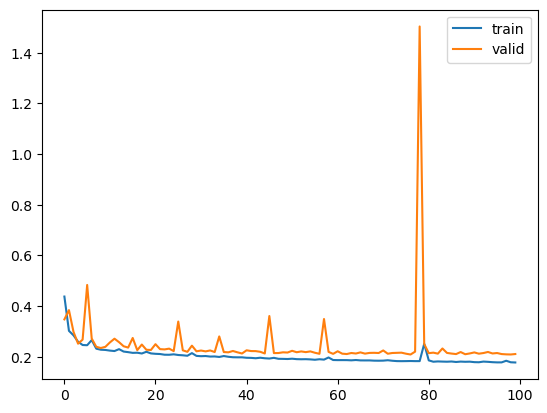

In [41]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='valid')
plt.legend()
plt.show()

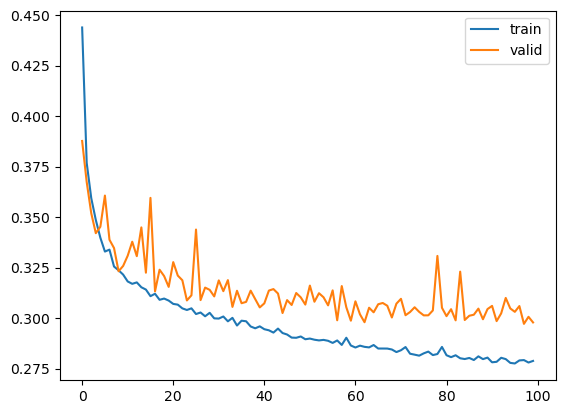

In [42]:
plt.plot(history2.history['mae'], label='train')
plt.plot(history2.history['val_mae'], label='valid')
plt.legend()
plt.show()

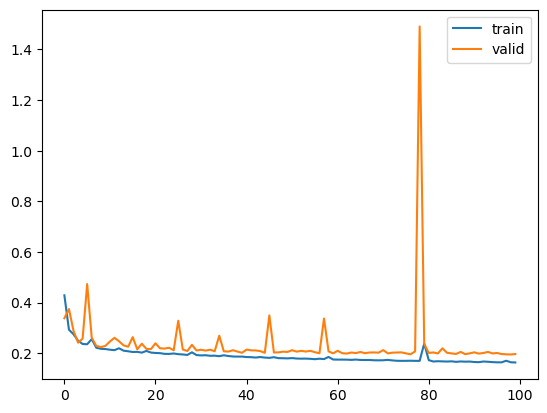

In [43]:
plt.plot(history2.history['mse'], label='train')
plt.plot(history2.history['val_mse'], label='valid')
plt.legend()
plt.show()

In [44]:
model2.evaluate(X_test_scaled, y_test_scaled)

129/129 [==============================] - 0s 749us/step - loss: 0.2152 - mae: 0.3027 - mse: 0.2016


[0.21517445147037506, 0.30269601941108704, 0.2015523612499237]

In [45]:
classif_data = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = classif_data.load_data()

In [46]:
train_images = train_images / 255.
test_images = test_images / 255.

In [47]:
conv_model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

In [48]:
conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [49]:
optimizer_conv = tf.keras.optimizers.Adam()

In [50]:
optimizer_loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [51]:
conv_model.compile(optimizer=optimizer_conv, loss=optimizer_loss, metrics=['accuracy'])

In [52]:
history_conv = conv_model.fit(train_images[..., None], train_labels, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100


2024-05-09 09:39:29.542620: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401


1500/1500 [==============================] - 7s 3ms/step - loss: 0.5336 - accuracy: 0.8048 - val_loss: 0.3893 - val_accuracy: 0.8577
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3414 - accuracy: 0.8746 - val_loss: 0.3282 - val_accuracy: 0.8782
Epoch 3/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2945 - accuracy: 0.8914 - val_loss: 0.2950 - val_accuracy: 0.8935
Epoch 4/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2627 - accuracy: 0.9026 - val_loss: 0.2778 - val_accuracy: 0.8962
Epoch 5/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2370 - accuracy: 0.9128 - val_loss: 0.2625 - val_accuracy: 0.9030
Epoch 6/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2161 - accuracy: 0.9191 - val_loss: 0.2587 - val_accuracy: 0.9070
Epoch 7/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1959 - accuracy: 0.9260 - val_loss: 0.2665 - val_accuracy: 0.90

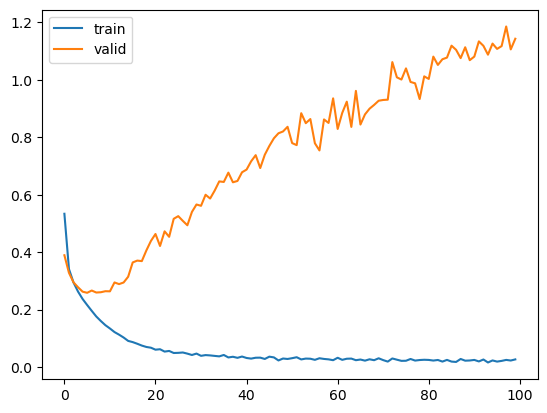

In [53]:
plt.plot(history_conv.history['loss'], label='train')
plt.plot(history_conv.history['val_loss'], label='valid')
plt.legend()
plt.show()

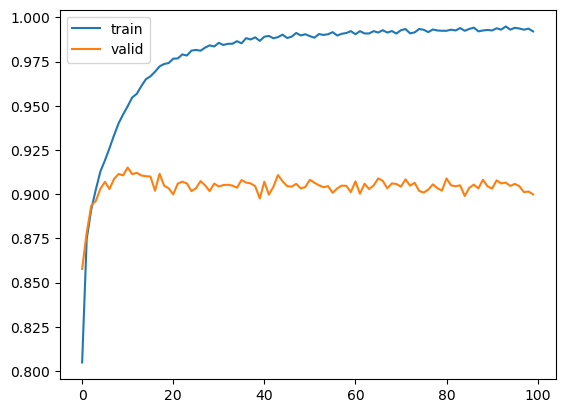

In [54]:
plt.plot(history_conv.history['accuracy'], label='train')
plt.plot(history_conv.history['val_accuracy'], label='valid')
plt.legend()
plt.show()

In [55]:
conv_model.evaluate(test_images[..., None], test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 1.2770 - accuracy: 0.8992


[1.2769684791564941, 0.8992000222206116]

In [56]:
from sklearn.metrics import confusion_matrix

y_pred = conv_model.predict(test_images[..., None])

y_pred_labels = y_pred.argmax(axis=1)

conf = confusion_matrix(test_labels, y_pred_labels)


313/313 [==============================] - 0s 634us/step


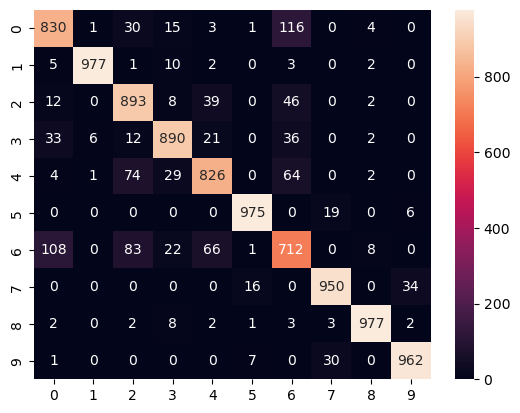

In [57]:

import seaborn as sns

sns.heatmap(conf, annot=True, fmt='d')
plt.show()

In [58]:
import numpy as np

images = np.concatenate([train_images, test_images], axis=0)
labels = np.concatenate([train_labels, test_labels], axis=0)

In [59]:
images.shape, labels.shape

((70000, 28, 28), (70000,))

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(images.reshape(images.shape[0], -1))

images_pca = pca.transform(images.reshape(images.shape[0], -1))

images_pca.shape

(70000, 2)

In [61]:
pca.explained_variance_ratio_

array([0.2905654 , 0.17738509])

In [62]:
df_images_pca = pd.DataFrame(images_pca, columns=['PCA_0', 'PCA_1'])
df_images_pca['LABEL'] = labels

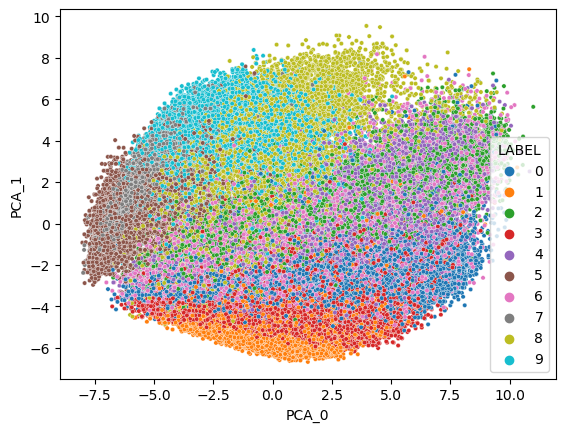

In [63]:
sns.scatterplot(
    data=df_images_pca, x='PCA_0', y='PCA_1', hue='LABEL', palette='tab10',
    s=10)
plt.show()

In [64]:
y_pred = conv_model.predict(images[..., None])
labels_pred = y_pred.argmax(-1)

2188/2188 [==============================] - 2s 978us/step


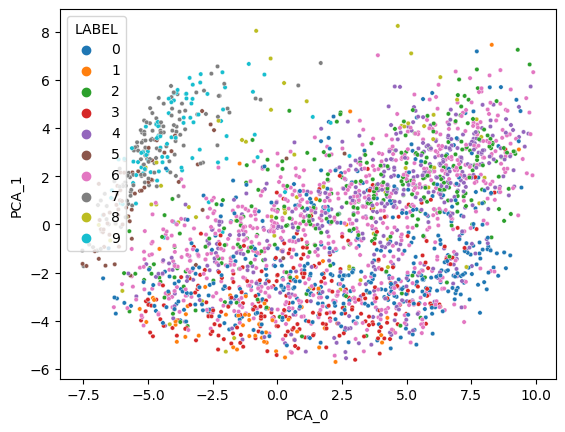

In [65]:
sns.scatterplot(
    data=df_images_pca.loc[labels_pred != labels], x='PCA_0', y='PCA_1', hue='LABEL', palette='tab10',
    s=10)
plt.show()

In [66]:
df_images_pca['PRED'] = labels_pred

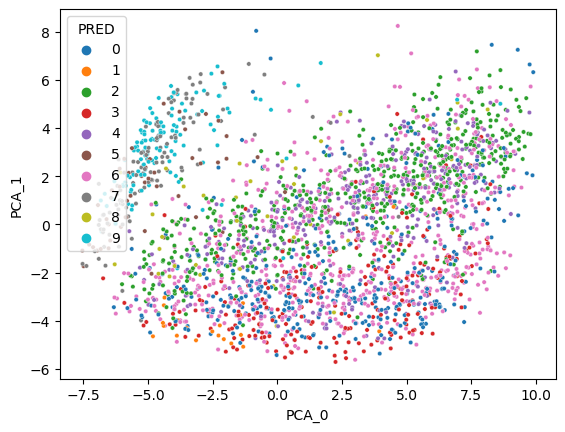

In [67]:
sns.scatterplot(
    data=df_images_pca.loc[labels_pred != labels], x='PCA_0', y='PCA_1', hue='PRED', palette='tab10',
    s=10)
plt.show()

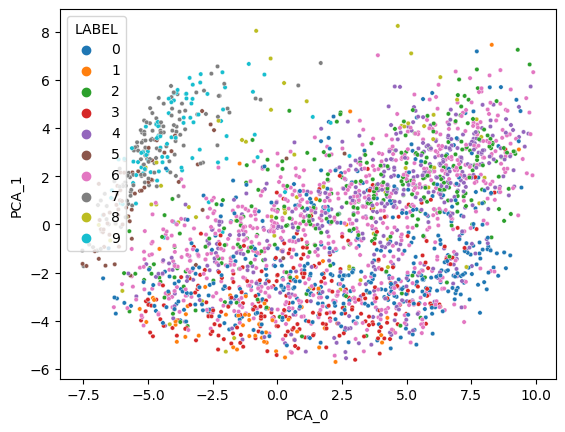

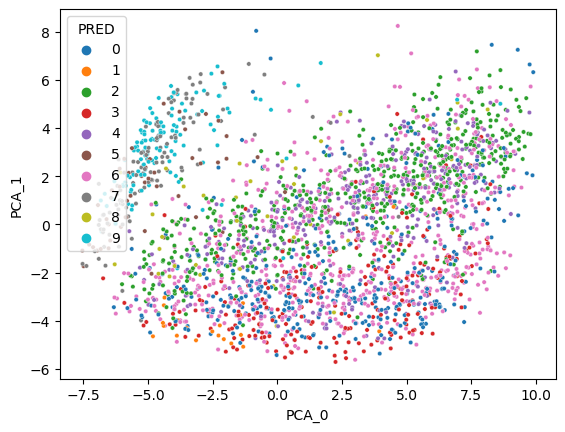

In [68]:
sns.scatterplot(
    data=df_images_pca.loc[labels_pred != labels], x='PCA_0', y='PCA_1', hue='LABEL', palette='tab10',
    s=10)
plt.show()
sns.scatterplot(
    data=df_images_pca.loc[labels_pred != labels], x='PCA_0', y='PCA_1', hue='PRED', palette='tab10',
    s=10)
plt.show()